# Data Science Festival 2020
## Going postal: How to craft a cutting-edge route optimisation engine in-house that suits your business needs

Fabrice Durier - fabrice.durier@royalmail.com 

Hugo Galy - hugo.galy@royalmail.com

Louisa Sober - louisa.sober@royalmail.com


## Background Information

Structure of a postcode EH12 9DN:
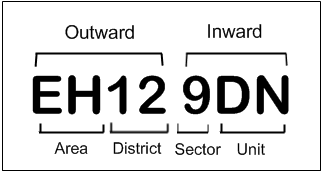

Info on what a delivery office does

## Repo Structure

In [3]:
import os

In [4]:
os.getcwd()
%pwd

'/Users/louisasober/rm_projects/dsf_royalmail_2020'

<div>
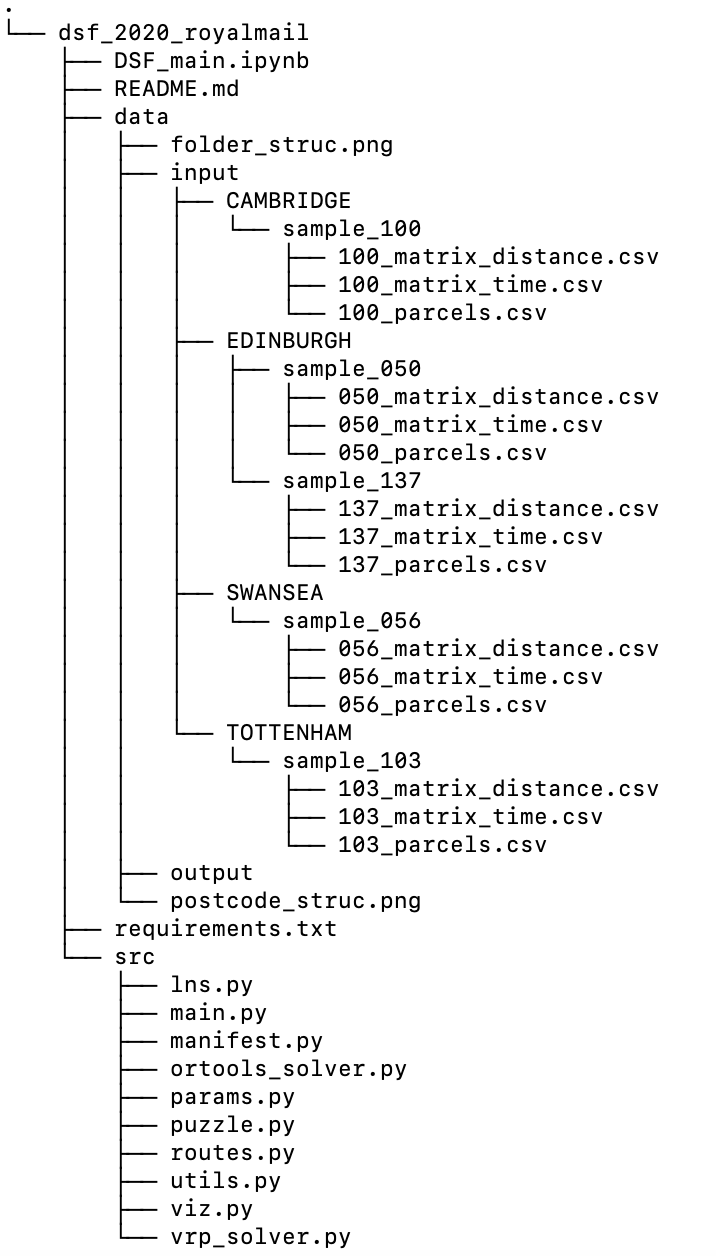
</div>

## Setting up Constraints

In [3]:
os.chdir('./src/')
%pwd

'/Users/louisasober/rm_projects/dsf_2020/src'

In [4]:
import params as setup

In [5]:
setup_dict = dict([(name, cls) for name, cls in setup.__dict__.items() if "__" not in name])
for idx, key in enumerate(setup_dict):
    if idx < 7:
        print(key,"=",setup_dict[key])

depot_name = EDINBURGH
sample_name = sample_050
max_vans = 5
max_duty = 360
min_duty = 0
service_time = 5
departure_time = 10:00


## Import data

In [6]:
from puzzle import puzzle_class

In [7]:
puzzle = puzzle_class(input=setup)


Puzzle Constraints:

	 Depot Name:            EDINBURGH
	 Depot Postcode:        EH12 9PB
	 Depot Latitude:        55.92849341
	 Depot Longitude:       -3.301661855
	 Depot Max Fleet Size:   5 [vans]
	 Depot Max Duty Time:  360 [min]
	 Depot Service Time:     5 [min]

Delivery Points Coordinates:

        postcode   latitude  longitude
id                                    
pc_001  EH21 6NX  55.939856  -3.065513
pc_002  EH14 5SW  55.890223  -3.330329
pc_003  EH11 3BD  55.936345  -3.253339
pc_004   EH7 5NW  55.960307  -3.172372
pc_005  EH15 2NW  55.944777  -3.094582
pc_006  EH12 9AW  55.932246  -3.279730
pc_007  EH14 5QE  55.896023  -3.314887
pc_008   EH9 2LP  55.931263  -3.183899
pc_009  EH33 2QT  55.933932  -2.949380
pc_010  EH52 6NG  55.946943  -3.509429
pc_011  EH38 5YR  55.770405  -2.939215
pc_012  EH14 5EJ  55.903713  -3.291282
pc_013  EH28 8TH  55.942340  -3.405591
pc_014  EH20 9ED  55.881640  -3.154205
pc_015  EH55 8SE  55.857976  -3.554579
pc_016  EH47 0EW  55.866868  -3.69511

## Initial Exploration

* stats of the dist and time matrices
* how many parcels, stops
* hub info

In [8]:
puzzle.distance_mtx.head()

,depot,pc_001,pc_002,pc_003,pc_004,pc_005,pc_006,pc_007,pc_008,pc_009,...,pc_041,pc_042,pc_043,pc_044,pc_045,pc_046,pc_047,pc_048,pc_049,pc_050
depot,0.0000,22.3440,7.6500,3.9510,11.2424,24.4927,2.3561,6.4031,10.1073,29.5804,...,5.5426,9.5540,15.1734,27.5687,8.8231,23.5318,16.8915,6.0191,13.7967,9.6489
pc_001,22.2554,0.0000,23.4741,23.3702,9.4082,3.3037,22.4118,22.4643,9.4555,11.2943,...,24.9618,11.6953,13.9283,11.9151,12.4324,5.8744,8.9677,26.8821,10.5241,10.4994
pc_002,7.6019,23.2579,0.0000,8.7167,13.6790,25.4066,7.7582,1.3773,11.9660,30.4942,...,10.0248,12.0735,16.0873,28.4826,11.3426,24.4456,17.8054,11.1991,18.9766,12.1704
pc_003,3.8555,23.2487,8.5547,0.0000,6.8126,25.3975,3.1992,7.3078,5.7976,30.4851,...,1.6541,5.1242,8.7208,28.4734,4.3933,9.5361,17.7962,6.1056,8.7077,5.6959
pc_004,11.1907,9.3182,13.5209,6.8892,0.0000,6.3039,9.6959,12.5111,4.4807,18.8547,...,6.0134,2.9881,5.7984,19.4806,3.7252,3.3328,13.4033,9.1043,2.2219,2.0933


In [9]:
from viz import *

<module 'matplotlib.pyplot' from '/Users/louisasober/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

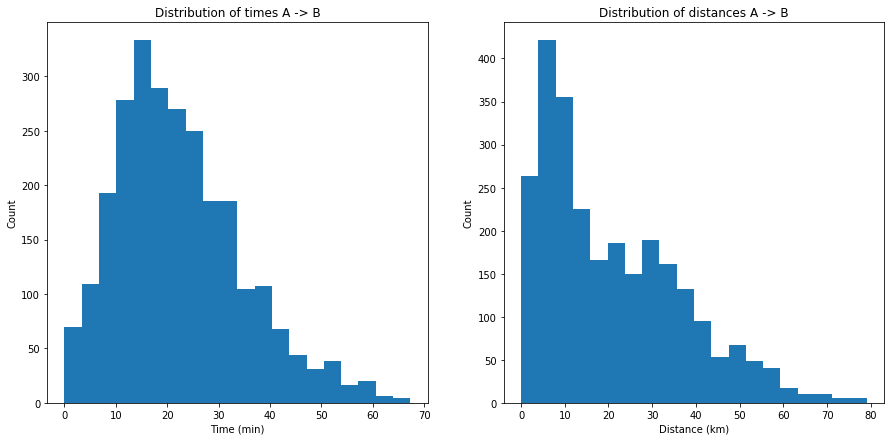

In [10]:
plot_travel_data_distributions(puzzle, "travel_data.png")

<module 'matplotlib.pyplot' from '/Users/louisasober/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

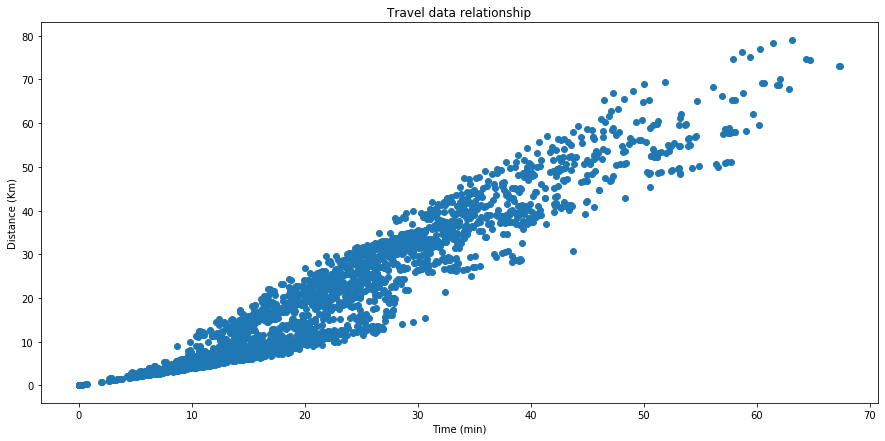

In [11]:
plot_travel_metric_scatter(puzzle, "travel_metrics.png")

## Visulatisation

In [12]:
init_map(puzzle, "delivery_point_locations.html")

### ... Time for a Break ...

## Building Routes

In [13]:
from routes import routes_class

In [14]:
init_routes = routes_class(puzzle)

In [15]:
init_routes.build_at_random(puzzle)


 Initialisation of Routes at Random...


In [16]:
routes_map(puzzle, init_routes, "init_routes_random.html")

In [17]:
init_routes.total_time

1446.8195999999998

In [18]:
init_routes.build_from_postcodes(puzzle)


 Initialisation of Routes from Sorted Postcodes...


In [19]:
routes_map(puzzle, init_routes, "init_routes_postcodes.html")

In [20]:
init_routes.total_time

952.6981999999999

# Move to IDE!